# FAKE NEWS CLASSIFIER 

The problem of the fake news publication is not new and it already has been
reported in ancient ages, but it has started having a huge impact especially on
social media users.

Such false information should be detected as soon as possible to avoid its negative
influence on the readers and in some cases on their decisions, e.g., during the
election.


In this Data Science project we will be creating a fake news classifier using
Machine Learning techniques and Python.


#### You can download the data set you need for this task from here :

https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

### Lets start with the classifier :

In [1]:
import pandas as pd
df=pd.read_csv('news.csv')
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


#### #Get the independent features 

In [2]:
X=df.drop('label',axis=1)
print(X.head())


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text  
0  Daniel Greenfield, a Shillman Journalism Fello...  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  
2  U.S. Secretary of State John F. Kerry said Mon...  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  
4  It's primary day in New York and front-runners...  


#### #Get the dependent features

In [3]:
y=df['label']
y.head()


0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
df.shape


(6335, 4)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer , HashingVectorizer

In [6]:
df=df.dropna()
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [7]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(10)

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [8]:
messages['text'][6]


'Share This Baylee Luciani (left), Screenshot of what Baylee caught on FaceTime (right) \nThe closest Baylee Luciani could get to her boyfriend, who’s attending college in Austin, was through video online chat. The couple had regular “dates” this way to bridge the 200-mile distance between them. However, the endearing arrangement quickly came to an end after his FaceTime was left on and caught something that left his girlfriend horrified. \nBaylee had been discussing regular things with her boyfriend, Yale Gerstein, who was on the other side of the screen on an otherwise average evening. This video chat was not unlike all the others she had with Yale from his apartment near Austin Community College until the 19-year-old girlfriend heard some scratching sounds after FaceTime had been left on. \nAccording to KRON , Baylee was mid-conversation with Yale when scratches at the door caught both of their attention and he got up from his bed, where the computer was, to see who was at his door.

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
     review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
     review = review.lower()
     review = review.split()

     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
     review = ' '.join(review)
     corpus.append(review)

In [10]:
corpus[3]

'berni support twitter erupt anger dnc tri warn'

#### # TFidf Vectorizer


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()
X.shape

(6335, 5000)

In [12]:
y=messages['label']


#### # Divide the dataset into Train and Test

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33,random_state = 0)
tfidf_v.get_feature_names()[:20]


['abandon',
 'abc',
 'abc news',
 'abdullah',
 'abedin',
 'abedin weiner',
 'abedin weiner laptop',
 'abil',
 'aboard',
 'abolish',
 'abort',
 'abort answer',
 'absolut',
 'abstain',
 'abstain un',
 'abstain un vote',
 'absurd',
 'abus',
 'abus power',
 'accept']

In [14]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [15]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head()


,abandon,abc,abc news,abdullah,abedin,abedin weiner,abedin weiner laptop,abil,aboard,abolish,...,zika scaremong,zika scaremong washington,zika viru,zika viru caus,zika viru harmless,zionist,zionist stoog,zone,zuckerberg,zuess
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
     """
     See full source and example:
     http://scikit-learn.org/stable/auto_examples/model_selecti

     This function prints and plots the confusion matrix.
     Normalization can be applied by setting `normalize=True`.
     """
     plt.imshow(cm, interpolation='nearest', cmap=cmap)
     plt.title(title)
     plt.colorbar()
     tick_marks = np.arange(len(classes))
     plt.xticks(tick_marks, classes, rotation=45)
     plt.yticks(tick_marks, classes)
     if normalize:
         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
         print("Normalized confusion matrix")
     else:
         print('Confusion matrix, without normalization')
            
     thresh = cm.max() / 2.
     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
     plt.tight_layout()
     plt.ylabel('True label')
     plt.xlabel('Predicted label')

### MultinomialNB Algorithm

accuracy: 0.821
Confusion matrix, without normalization


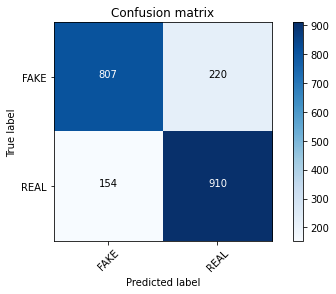

In [17]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


### Passive Agressive Classifier Algorithm

accuracy: 0.780
Confusion matrix, without normalization


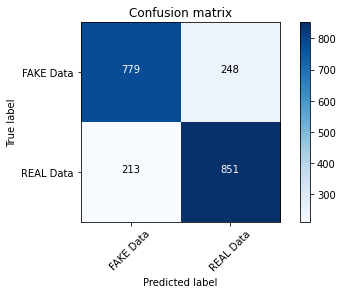

In [20]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])